In [2]:
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
nodes = [0, 1, 2, 3, 4, 5, 6]
edges = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6],
         [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 1]]

all_colourings = set()
C = 4
colours = ['red', 'blue', 'green', 'yellow']

def colouring(colours, colouring_now):
    if len(colouring_now) == len(nodes):
        all_colourings.add(tuple(colouring_now))
        return
    for colour in colours:
        colouring(colours, colouring_now + [colour])

colouring(colours, [])
print(len(all_colourings))


# Remove Invalid Colourings
for colouring in all_colourings.copy():
    for edge in edges:
        if colouring[edge[0]] == colouring[edge[1]]:
            all_colourings.remove(colouring)
            break
print(len(all_colourings))


# Remove less that 5 colors
for colouring in all_colourings.copy():
    if len(set(colouring)) < C:
        all_colourings.remove(colouring)
print(len(all_colourings))


# Add all permutations of colours
colours_maps = []
for p_color in permutations(colours):
    colours_map = {}
    for i in range(len(colours)):
        colours_map[colours[i]] = p_color[i]
    colours_maps.append(colours_map)
colours_maps.remove({i: i for i in colours})
for colouring in all_colourings.copy():
    for colours_map in colours_maps:
        new_colouring = []
        for colour in colouring:
            new_colouring.append(colours_map[colour])
        if tuple(new_colouring) in all_colourings:
            all_colourings.remove(colouring)
            break
print(len(all_colourings))

# Remove all rotations from index 1 to index 7
for colouring in all_colourings.copy():
    for i in range(6):
        rotated = tuple(colouring[0]) + colouring[2+i:] + colouring[1:2+i]
        if tuple(rotated) in all_colourings:
            all_colourings.remove(colouring)
            break
print(len(all_colourings))

# Add all permutations of colours
colours_maps = []
for p_color in permutations(colours):
    colours_map = {}
    for i in range(len(colours)):
        colours_map[colours[i]] = p_color[i]
    colours_maps.append(colours_map)
colours_maps.remove({i: i for i in colours})
for colouring in all_colourings.copy():
    for colours_map in colours_maps:
        new_colouring = []
        for colour in colouring:
            new_colouring.append(colours_map[colour])
        if tuple(new_colouring) in all_colourings:
            all_colourings.remove(colouring)
            break
print(len(all_colourings))



# Replace the first element with a and swap rest
final_colors = set()

real_color_map = {
        'red': 'red',
        'blue': 'blue',
        'green': 'green',
        'yellow': 'yellow',
        'purple': 'purple'
    }
for colouring in all_colourings:
    final_color = []
    if colouring[0] == 'a':
        final_color = list(colouring)
    else:
        target = colouring[0]
        new_colors = []
        for colour in colouring:
            if colour == 'red':
                new_colors.append(target)
            elif colour == target:
                new_colors.append('red')
            else:
                new_colors.append(colour)
        final_color = list(new_colors)
    
    for i in range(len(final_color)):
        final_color[i] = real_color_map[final_color[i]]
    final_colors.add(tuple(final_color))

print(final_colors)

16384
264
240
10
10
10
{('red', 'green', 'blue', 'yellow', 'green', 'yellow', 'blue'), ('red', 'green', 'blue', 'yellow', 'blue', 'green', 'yellow'), ('red', 'blue', 'green', 'blue', 'green', 'blue', 'yellow'), ('red', 'blue', 'yellow', 'blue', 'yellow', 'green', 'yellow'), ('red', 'green', 'blue', 'green', 'yellow', 'blue', 'yellow'), ('red', 'blue', 'green', 'yellow', 'blue', 'green', 'yellow'), ('red', 'blue', 'green', 'yellow', 'green', 'blue', 'green'), ('red', 'green', 'blue', 'green', 'yellow', 'green', 'blue'), ('red', 'blue', 'green', 'yellow', 'green', 'yellow', 'green'), ('red', 'green', 'blue', 'green', 'yellow', 'green', 'yellow')}


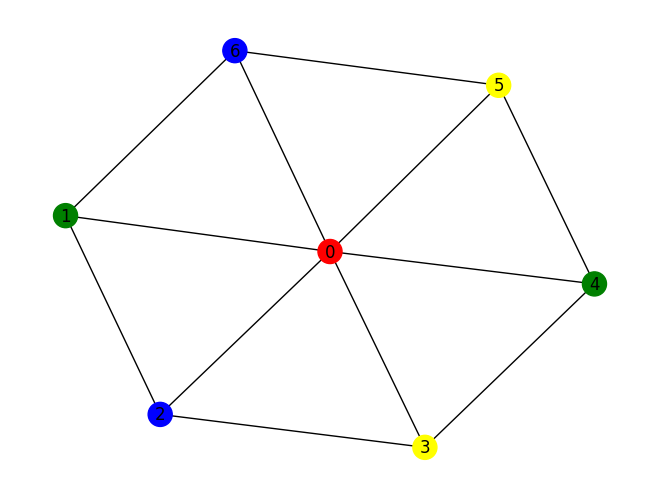

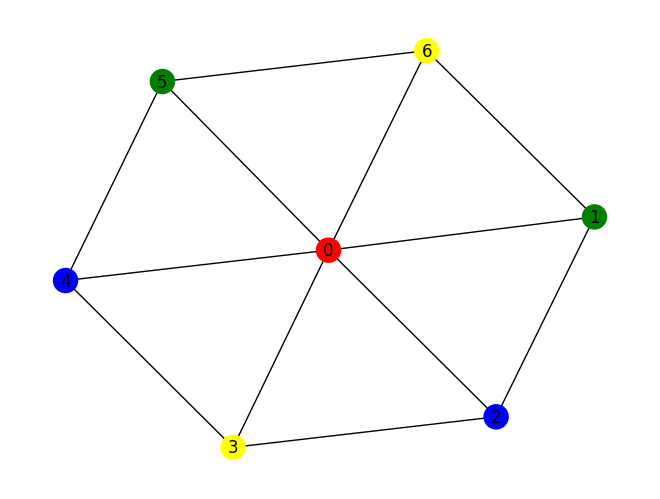

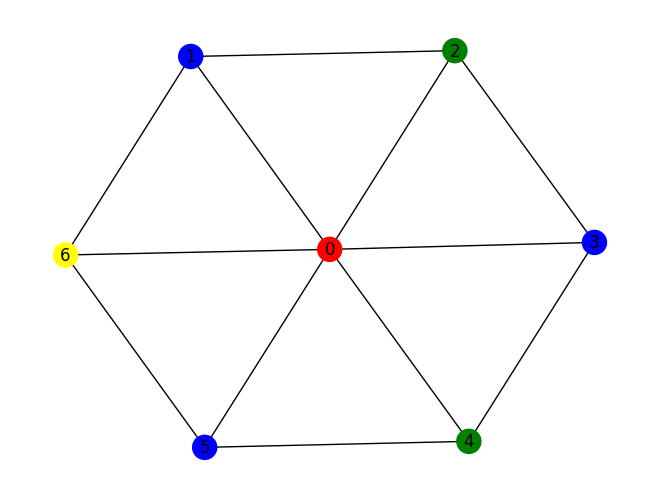

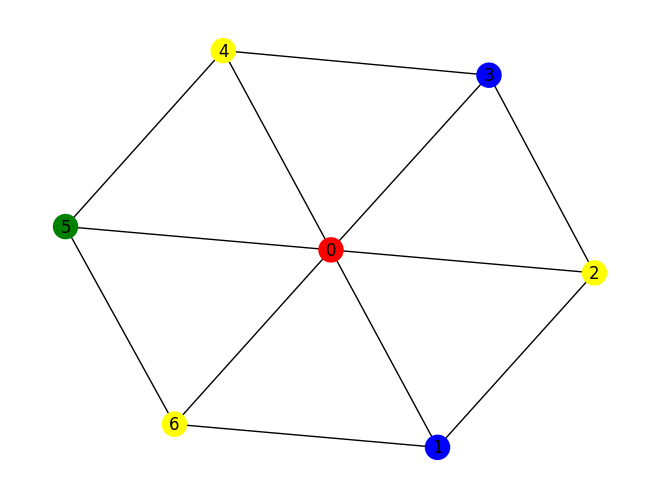

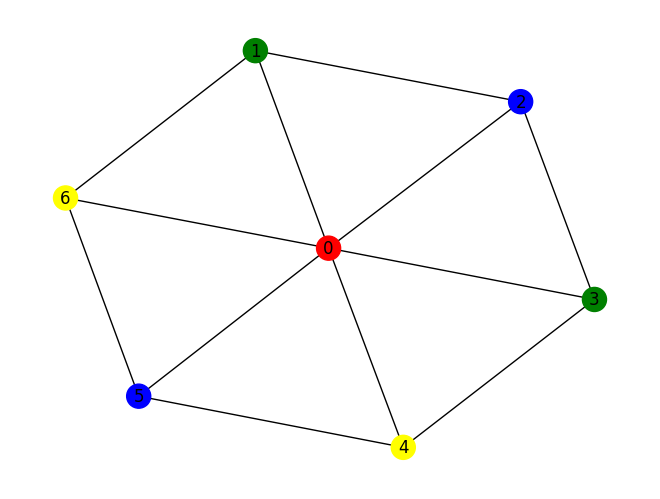

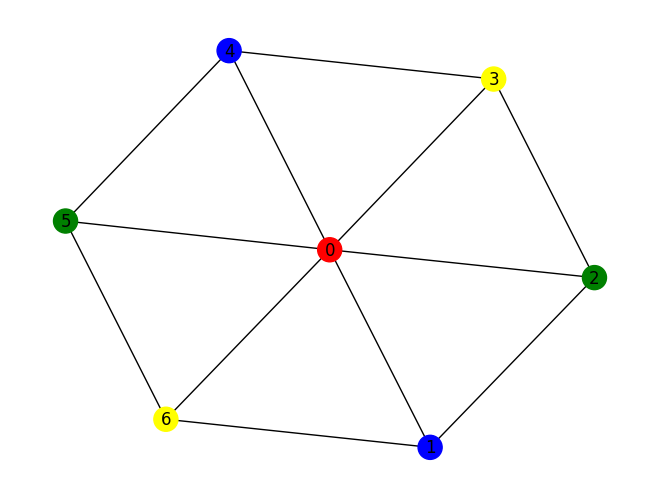

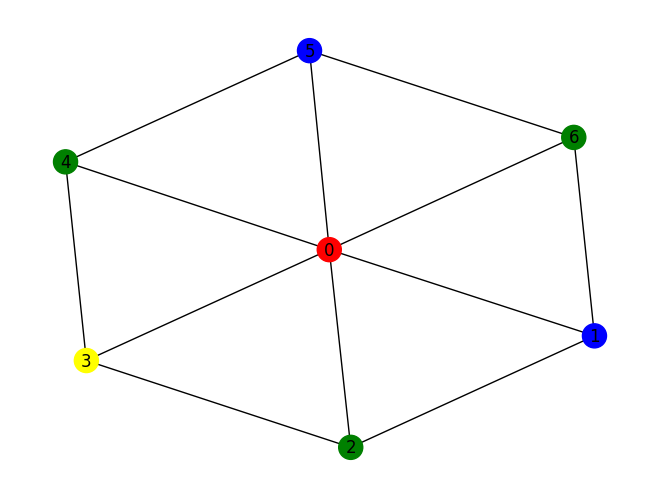

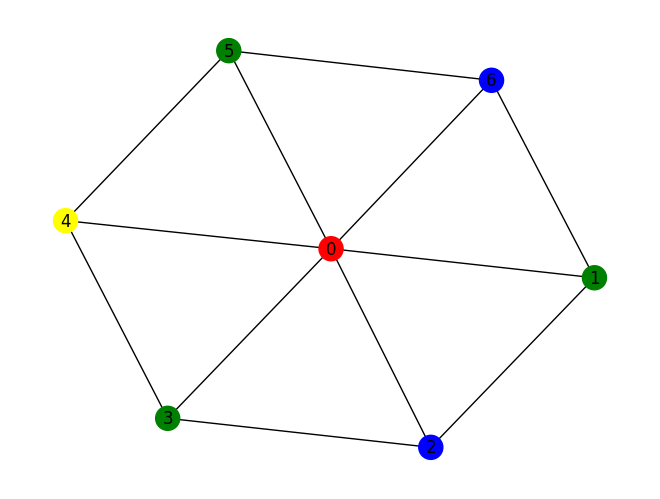

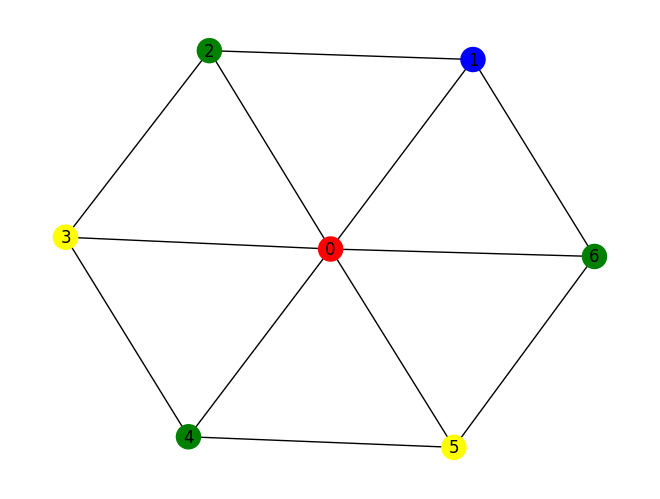

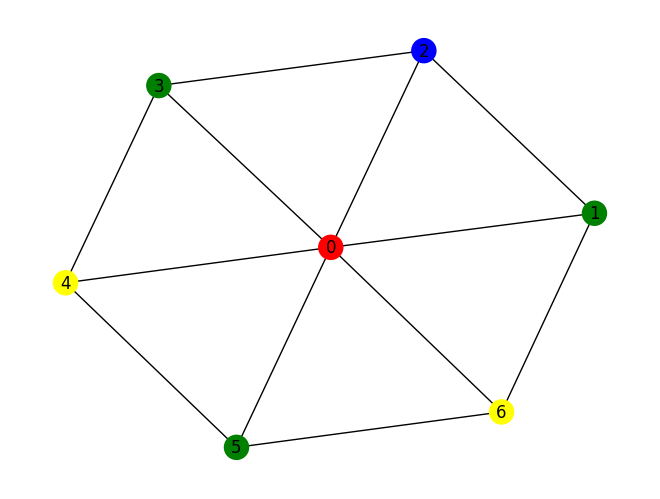

In [6]:
# Draw the graph with the final colors
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

for color in final_colors:
    layout = nx.spring_layout(G)
    nx.draw(G, layout, node_color=color, with_labels=True)
    plt.show()